In [38]:
import numpy as np
import pandas as pd

In [39]:
data=pd.read_csv("sales.csv")  #P.s. Check dataset values with problem statement input
data

,Age,Income,Gender,MaritialStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [40]:
data.describe()

,Age,Income,Gender,MaritialStatus,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Married,Yes
freq,5,6,7,7,9


In [41]:
#data.groupby('Age').count()

In [54]:
#data.apply(pd.value_counts)
data['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
#data=data.apply(le.fit_transform)
x=data.iloc[:,:-1] #-1 means don't take last column 
x=x.apply(le.fit_transform)
#find label with their encoded value
print("Age with encodd value :",list( zip(data.iloc[:,0], x.iloc[:,0])))
print("\nIncome with encoded value :",list( zip(data.iloc[:,1], x.iloc[:,1])))
print("\nGender with encoded value :",list( zip(data.iloc[:,2], x.iloc[:,2])))
print("\nmaritialStatus with encoded value :",list( zip(data.iloc[:,3], x.iloc[:,3])))

Age with encodd value : [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]

Income with encoded value : [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]

Gender with encoded value : [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]

maritialStatus with encoded value : [('Single', 1), ('Married', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0), ('Single', 1), ('Married', 0), ('Married', 0), ('Single', 1), ('Married', 0)]


In [44]:
#Store labels in Y
y=data.iloc[:,-1]

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
#Predict value for the given Expression
#[Age < 21, Income = Low,Gender = Female, Marital Status = Married]
test_x=np.array([1,1,0,0])
pred_y=classifier.predict([test_x])
print("Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]\n", test_x," is ",pred_y[0])

Predicted class for input [Age < 21, Income = Low,Gender = Female, Marital Status = Married]
 [1 1 0 0]  is  Yes


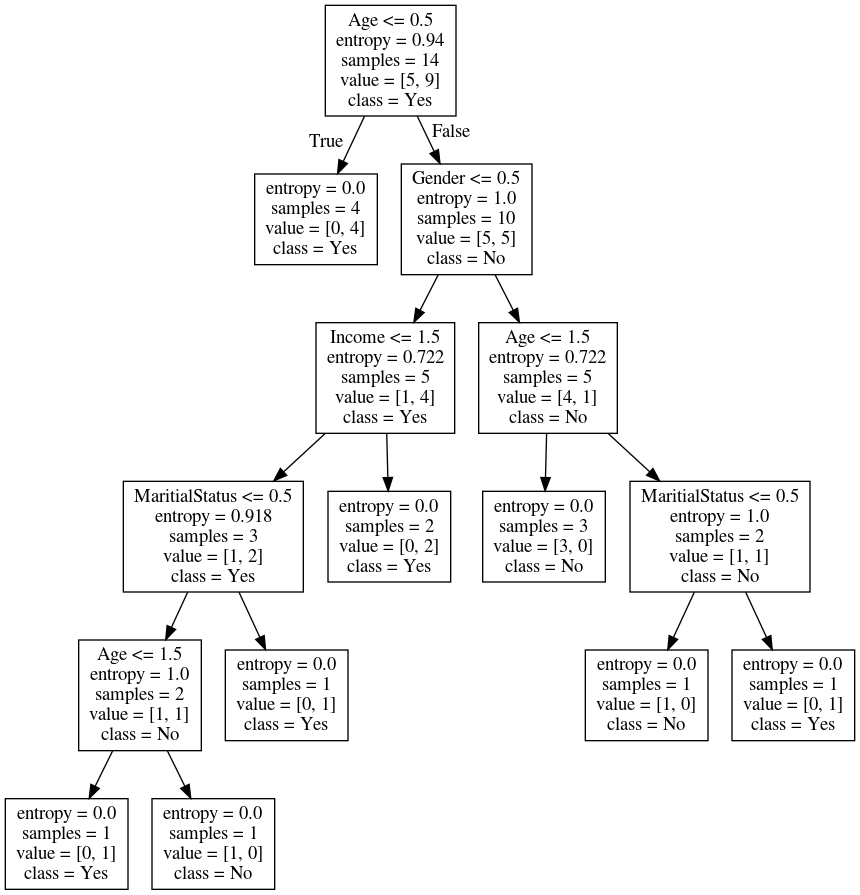

In [49]:
#method to generate graph p.s. needs dot utility installed in os
from sklearn.tree import export_graphviz
from IPython.display import Image
export_graphviz(classifier,out_file="data.dot",feature_names=x.columns,class_names=["No","Yes"])
#you need to install graphviz in fedora(IN LAB) for running below dor command
#yum install graphviz

#then go to terminal and cd to directory where you are saving jupyter notebook
# and execute below command
#    dot -Tpng data.dot -o tree.png
  
    
!dot -Tpng data.dot -o tree.png
Image("tree.png")

In [15]:
#End of PROGRAM

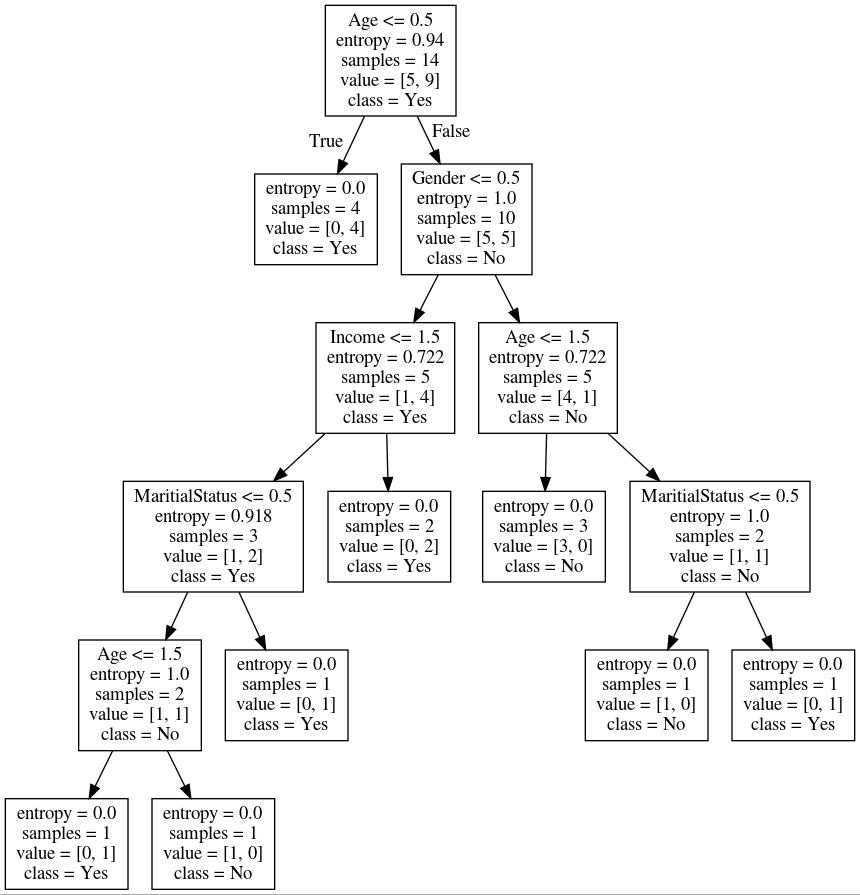

In [55]:
from sklearn.externals.six import StringIO
import pydotplus as pdd
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_dat=export_graphviz(classifier,out_file=None,feature_names=x.columns,class_names=["No","Yes"])
graph=pdd.graph_from_dot_data(dot_dat)
graph.write_png("tree.png")
Image(graph.create_jpg())

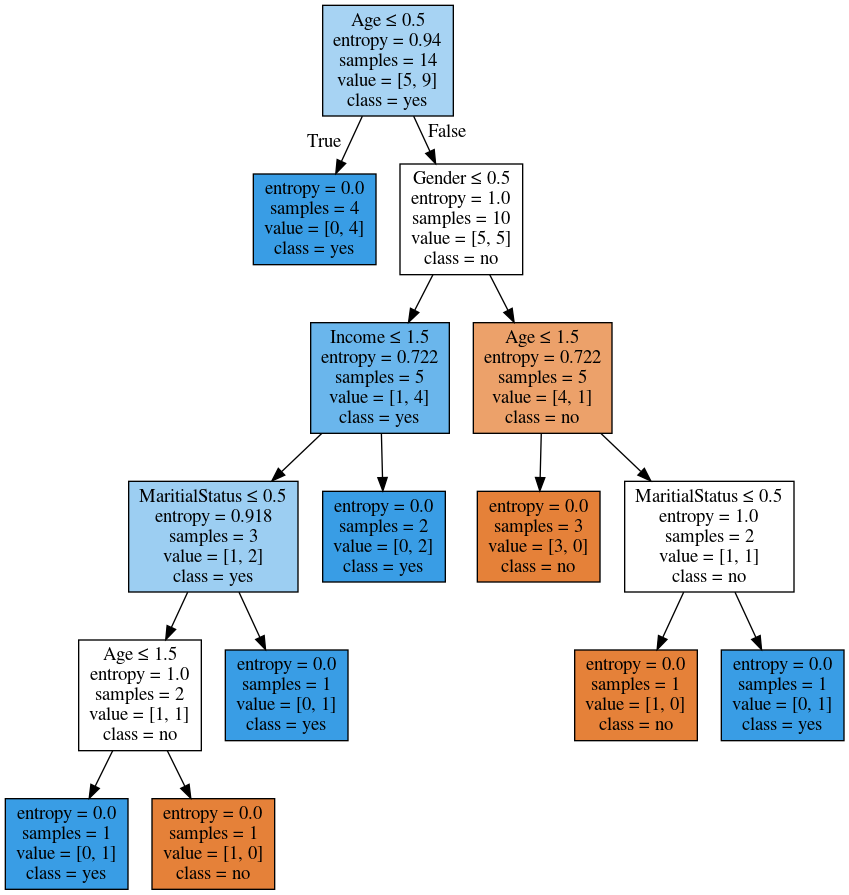

In [56]:
#method 3
import pydotplus as pdd
from IPython.display import Image
dot_data = export_graphviz(classifier, out_file=None,feature_names=x.columns,class_names=['no', 'yes'], filled = True,special_characters=True)

graph = pdd.graph_from_dot_data(dot_data)  

Image(graph.create_png())
graph.write_png("dtree.png")
Image(graph.create_png())

In [57]:
#run below command to install graphviz
# !pip install graphviz

In [62]:
#No need to implement below code
#if you want to split into train test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
train,test=train_test_split(data.apply(le.fit_transform),test_size=0.14,random_state=0)
train_x=train.iloc[:,:-1]
train_y=train.iloc[:,-1]
test_x=test.iloc[:,:-1]
test_y=test.iloc[:,-1]
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(train_x,train_y)
pred_y=clf.predict(test_x)
accuracy=accuracy_score(test_y,pred_y)
accuracy*100

100.0

In [59]:
test

,Age,Income,Gender,MaritialStatus,Buys
8,1,1,0,0,1
6,0,1,0,0,1


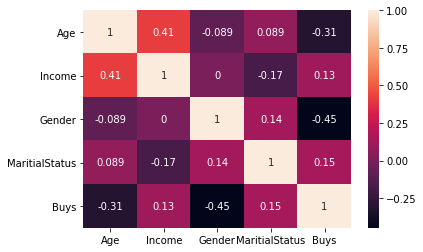

In [61]:
#just displaying correlation between fields
import seaborn as sns
corr=data.apply(le.fit_transform).corr();
sns.heatmap(corr,annot=True)